# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [105]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [106]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [107]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [108]:
df_train.shape

(15223, 52)

In [109]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [110]:
df_test.shape

(14910, 52)

In [111]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [112]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [113]:
df = df_test.append(df_train).reset_index(drop=True)

In [114]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [116]:
# for i in df_train.columns: # перебираем все столбцы
#     if str(df_train[i].dtype) == 'object': # если тип столбца - object
#         print('='*10)
#         print(i) # выводим название столбца
#         print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#         print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [117]:
# df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [118]:
# Список столбцов с пропусками.
for i in df.columns: # перебираем все столбцы
    if df[i].count() < df.shape[0]:
        print("%s: %s %s" % (i, df[i].count(), df[i].dtype))

GEN_INDUSTRY: 27420 object
GEN_TITLE: 27420 object
ORG_TP_STATE: 27420 object
ORG_TP_FCAPITAL: 27425 object
JOB_DIR: 27420 object
TP_PROVINCE: 29543 object
REGION_NM: 30131 object
WORK_TIME: 27416 float64
PREVIOUS_CARD_NUM_UTILIZED: 600 float64


In [119]:
print('Количество наблюдений с пустым WORK_TIME:', df[df.WORK_TIME.isnull()].shape[0])
print('Количество наблюдений с пустым WORK_TIME и SOCSTATUS_PENS_FL==1:', df[df.WORK_TIME.isnull() & (df.SOCSTATUS_PENS_FL==1)].shape[0])
print('\nНаблюдение с пустым WORK_TIME и SOCSTATUS_PENS_FL==0:\n\n', 
    df[
        df.WORK_TIME.isnull() & (df.SOCSTATUS_PENS_FL==0)
    ][['WORK_TIME', 'SOCSTATUS_PENS_FL']].head())

Количество наблюдений с пустым WORK_TIME: 2717
Количество наблюдений с пустым WORK_TIME и SOCSTATUS_PENS_FL==1: 2716

Наблюдение с пустым WORK_TIME и SOCSTATUS_PENS_FL==0:

        WORK_TIME  SOCSTATUS_PENS_FL
22873        NaN                  0


In [120]:
print('Количество наблюдений с пустым GEN_INDUSTRY:', df[df.GEN_INDUSTRY.isnull()].shape[0])
print('Количество наблюдений с пустым GEN_TITLE:', df[df.GEN_TITLE.isnull()].shape[0])
print('Количество наблюдений с пустым JOB_DIR:', df[df.JOB_DIR.isnull()].shape[0])
print('Количество наблюдений с пустыми GEN_INDUSTRY, GEN_TITLE, JOB_DIR и SOCSTATUS_WORK_FL==0:', 
      df[
        df.GEN_INDUSTRY.isnull() & 
        df.GEN_TITLE.isnull() & 
        df.JOB_DIR.isnull() &
        (df.SOCSTATUS_WORK_FL==0)
    ].shape[0]
)

print('\nНаблюдение с пустыми GEN_INDUSTRY, GEN_TITLE, JOB_DIR и SOCSTATUS_WORK_FL==1:\n\n', 
      df[
        df.GEN_INDUSTRY.isnull() & 
        df.GEN_TITLE.isnull() & 
        df.JOB_DIR.isnull() &
        (df.SOCSTATUS_WORK_FL==1)
    ][['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'SOCSTATUS_WORK_FL']].head())


Количество наблюдений с пустым GEN_INDUSTRY: 2713
Количество наблюдений с пустым GEN_TITLE: 2713
Количество наблюдений с пустым JOB_DIR: 2713
Количество наблюдений с пустыми GEN_INDUSTRY, GEN_TITLE, JOB_DIR и SOCSTATUS_WORK_FL==0: 2712

Наблюдение с пустыми GEN_INDUSTRY, GEN_TITLE, JOB_DIR и SOCSTATUS_WORK_FL==1:

       GEN_INDUSTRY GEN_TITLE JOB_DIR  SOCSTATUS_WORK_FL
22873          NaN       NaN     NaN                  1


### Пропуски 

**WORK_TIME**: заполним нулями, судя по всему, все наблюдения, в которых не заполнен этот признак, являются пенсионерами, кроме **id==22873**

**GEN_INDUSTRY, GEN_TITLE и JOB_DIR**: заполним строкой "**missing**", кроме **id==22873**

Саму строку с **id==22873** удалим

**PREVIOUS_CARD_NUM_UTILIZED**: заполним нулями, так как в описании указано, что ***если пусто - 0***

Остальные пропуски (**ORG_TP_STATE, ORG_TP_FCAPITAL, TP_PROVINCE, REGION_NM**) заполним строкой **'missing'**

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

### Категориальные признаки
Все строковые признаки являются категориальными, используем для их преобразования ***get_dummies()***

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [122]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # Удалим идентификатор AGREEMENT_RK и наблюдение с id==22873
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    df_output = df_output.drop([22873])
    
    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, 
    # LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    for i in ('PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'):
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Что-то делала с пропусками
    for i in ('GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR'):
        df_output[i] = df_output[i].fillna('missing')
        
    for i in ('ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'TP_PROVINCE', 'REGION_NM'):
        df_output[i] = df_output[i].fillna('missing')
    
    for i in ('WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED'):
        df_output[i] = df_output[i].fillna(0)
    
    # Кодировала категориальные признаки
    df_output = pd.get_dummies(df_output)
        
    return df_output

In [123]:
df_output = preproc_data(df)
df_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30132 entries, 0 to 30132
Columns: 452 entries, TARGET to sample_train
dtypes: float64(7), int64(31), uint8(414)
memory usage: 20.9 MB


In [126]:
df_preproc = df.pipe(preproc_data)

# df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
# df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_train'], axis=1).drop(['sample_test'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_train'], axis=1).drop(['sample_test'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [127]:
y = df_train_preproc.TARGET
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc.TARGET
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [128]:
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)


In [129]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test1)
predict_proba_dtc = dtc.predict_proba(X_test1)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test1)
predict_proba_rfc = rfc.predict_proba(X_test1)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test1)
predict_proba_lr = lr.predict_proba(X_test1)


/home/gudzon/.local/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [130]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_dtc = accuracy_score(y_test1, predict_dtc)
accuracy_rfc = accuracy_score(y_test1, predict_rfc) 
accuracy_lr = accuracy_score(y_test1, predict_lr)
print("accuracy_dtc: %s\naccuracy_rfc: %s\naccuracy_lr: %s\n" % (accuracy_dtc, accuracy_rfc, accuracy_lr))

accuracy_dtc: 0.8003065469673747
accuracy_rfc: 0.8740967812568425
accuracy_lr: 0.8745347054959492



In [131]:
recall_dtc = recall_score(y_test1, predict_dtc)
recall_rfc = recall_score(y_test1, predict_rfc)
recall_lr = recall_score(y_test1, predict_lr)
print("recall_dtc: %s\nrecall_rfc: %s\nrecall_lr: %s" % (recall_dtc, recall_rfc, recall_lr))

recall_dtc: 0.18309859154929578
recall_rfc: 0.007042253521126761
recall_lr: 0.0


In [132]:
precision_dtc = precision_score(y_test1, predict_dtc)
precision_rfc = precision_score(y_test1, predict_rfc)
precision_lr = precision_score(y_test1, predict_lr)
print("precision_dtc: %s\nprecision_rfc: %s\nprecision_lr: %s" % (precision_dtc, precision_rfc, precision_lr))

precision_dtc: 0.18840579710144928
precision_rfc: 0.26666666666666666
precision_lr: 0.0


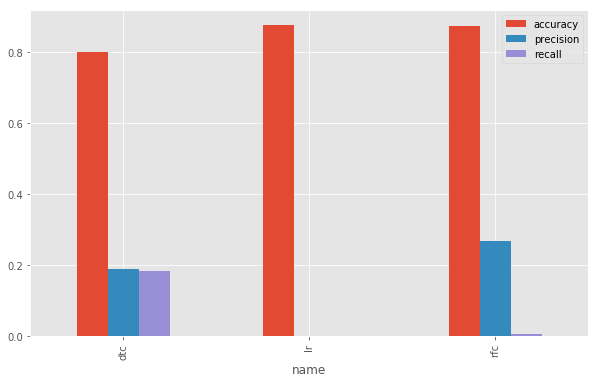

In [133]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

%matplotlib inline
from matplotlib import pyplot as plt

metrics = {
    'name': ['dtc', 'rfc', 'lr'], 
    'accuracy': [accuracy_dtc, accuracy_rfc, accuracy_lr],
    'recall': [recall_dtc, recall_rfc, recall_lr],
    'precision': [precision_dtc, precision_rfc, precision_lr]
}
metrics_df = pd.DataFrame(data=metrics)

fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.pivot_table(index='name').plot(kind='bar', ax=ax)

(-0.01, 1.01)

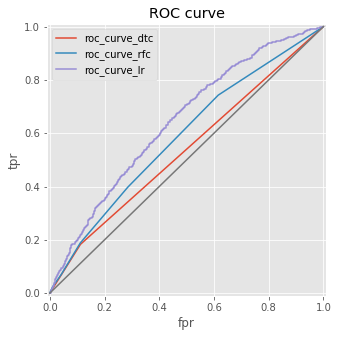

In [134]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test1, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test1, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, predict_proba_lr[:,1])

plt.figure(figsize=(5, 5))

plt.plot(fpr_dtc, tpr_dtc, label='roc_curve_dtc')
plt.plot(fpr_rfc, tpr_rfc, label='roc_curve_rfc')
plt.plot(fpr_lr, tpr_lr, label='roc_curve_lr')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend()
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [135]:
print('roc_auc_score_dtc', roc_auc_score(y_test1, predict_proba_dtc[:,1]))
print('roc_auc_score_rfc', roc_auc_score(y_test1, predict_proba_rfc[:,1]))
print('roc_auc_score_lr', roc_auc_score(y_test1, predict_proba_lr[:,1]))

roc_auc_score_dtc 0.5355352922737726
roc_auc_score_rfc 0.5849301233759144
roc_auc_score_lr 0.6422168922512317


In [136]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

cross_val_score_dtc = cross_val_score(
    DecisionTreeClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X,y)    
)

cross_val_score_rfc = cross_val_score(
    RandomForestClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X,y)   
)

cross_val_score_lr = cross_val_score(
    LogisticRegression(),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X,y)    
)

print("Средний roc_auc для DecisionTreeClassifier", np.mean(cross_val_score_dtc))
print("Средний roc_auc для RandomForestClassifier", np.mean(cross_val_score_rfc))
print("Средний roc_auc для LogisticRegression", np.mean(cross_val_score_lr))

Средний roc_auc для DecisionTreeClassifier 0.5307848617036945
Средний roc_auc для RandomForestClassifier 0.5918491501865004
Средний roc_auc для LogisticRegression 0.6412174453814857


In [137]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)


/home/gudzon/.local/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [138]:
# Померить roc_auc на тесте
cross_val_score_lr = cross_val_score(
    LogisticRegression(),
    X_test,
    y_test,
    scoring='roc_auc',
    cv=cv.split(X_test,y_test)    
)
cross_val_score_lr

array([0.62178029, 0.62634824, 0.59282241, 0.60548849, 0.65996092,
       0.60107251, 0.63795484, 0.60219713, 0.63716023, 0.62295701])

In [139]:
np.mean(cross_val_score_lr)

0.6207742075553626